In [25]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import scipy as sp
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import datetime as dt

plt.style.use('seaborn')
sns.set(style="white")

In [85]:
df = pd.read_csv('day.csv')

In [18]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [13]:
def columnize(df, column, new_vals, new_col):
    list1 = df[column].unique()
    dict1 = dict(zip(list1,new_vals))
    df[new_col] = df[column].map(dict1)
    df = pd.concat([df, pd.get_dummies(df[new_col])], 1)
    return df

In [14]:
df = columnize(df, 'weathersit', ['clear', 'misty', 'light_storm', 'heavy_storm'],'weather')

In [86]:
x=df.instant.values.reshape(-1,1)
y=df.cnt.values.reshape(-1,1)

reg = LinearRegression()
reg.fit(x, y)

reg.intercept_[0], reg.coef_[0][0]

(2392.961329010738, 5.768818328411378)

In [75]:
df['dteday'] = pd.to_datetime(df['dteday'])
df['dteday'] = df['dteday'].map(dt.datetime.toordinal)

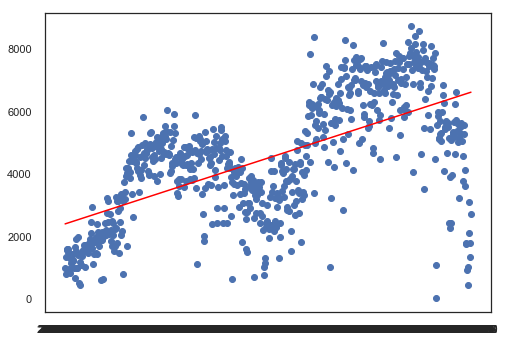

In [92]:
predictions = reg.predict(x)

plt.scatter(df['dteday'], df['cnt'])
plt.plot(df['dteday'],predictions,c='red')
plt.show()

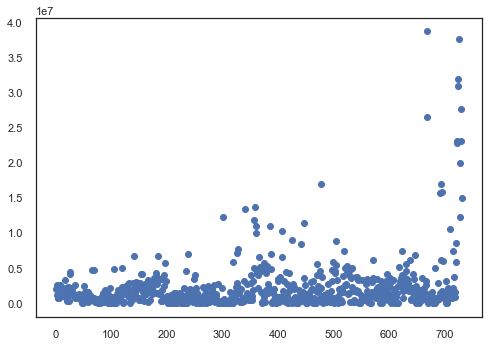

In [93]:
plt.scatter(df['instant'], df['resids']**2)

In [89]:
def resid(x,y):
    return (reg.coef_[0][0]*x + reg.intercept_[0]) - y

In [90]:
df['resids'] = resid(df['instant'], df['cnt'])